In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [ ]:
# Define the directory where your CSV files are located in Google Drive
directory = '/content/drive/My Drive/IFN646/'

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dataframes.append(df)

# Concatenate all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49312 entries, 0 to 49311
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  49312 non-null  object 
 1   Actiwatch activity counts  49100 non-null  float64
 2   Actiware classification    48919 non-null  float64
 3   Apple Watch ENMO           49278 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df.head()

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
0,01/01/2000 01:17:00,NaN,NaN,0.003123
1,01/01/2000 01:17:15,NaN,NaN,0.002960
2,01/01/2000 01:17:30,NaN,NaN,0.002921
3,01/01/2000 01:17:45,NaN,NaN,0.002907
4,01/01/2000 01:18:00,NaN,NaN,0.002932


In [ ]:
df.shape

(49312, 4)

In [ ]:
# Count the number of null values in each column
null_counts = df.isna().sum()

# To count the total number of null values in the entire DataFrame
total_null_count = df.isna().sum().sum()

print("Number of null values in each column:")
print(null_counts)

print("\nTotal number of null values in the DataFrame:")
print(total_null_count)


Number of null values in each column:
timestamp                      0
Actiwatch activity counts    212
Actiware classification      393
Apple Watch ENMO              34
dtype: int64

Total number of null values in the DataFrame:
639


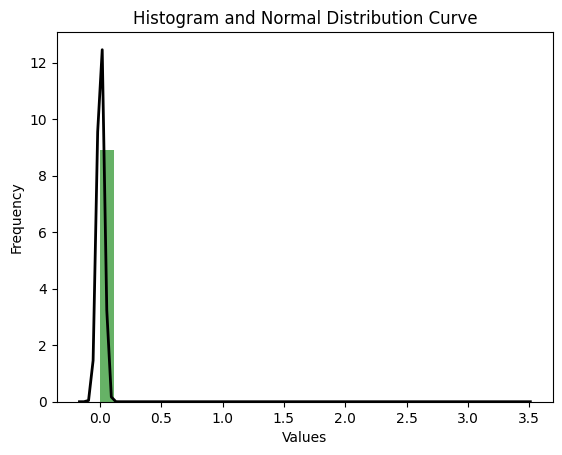

In [ ]:
# Plotting the histogram of the data
plt.hist(df['Apple Watch ENMO'][df['Apple Watch ENMO'].notnull()], bins=30, density=True, alpha=0.6, color='g')

# Getting the mean and standard deviation
mu, std = norm.fit(df['Apple Watch ENMO'][df['Apple Watch ENMO'].notnull()])

# Creating a normal distribution based on mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Adding a title and labels
plt.title("Histogram and Normal Distribution Curve")
plt.xlabel("Values")
plt.ylabel("Frequency")

# Display the plot
plt.show()

### data left side skewness, so we can go with filling the null values with the median.


In [ ]:
# Specify the columns to fill (exclude 'Actiware classification')
columns_to_fill = [col for col in df.columns if col != 'Actiware classification']

# Fill missing values with the mean of each column, excluding 'Actiware classification'
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())


<ipython-input-57-bae304a9fa24>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())


In [ ]:
df

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
0,01/01/2000 01:17:00,0.0,NaN,0.003123
1,01/01/2000 01:17:15,0.0,NaN,0.002960
2,01/01/2000 01:17:30,0.0,NaN,0.002921
3,01/01/2000 01:17:45,0.0,NaN,0.002907
4,01/01/2000 01:18:00,0.0,NaN,0.002932
...,...,...,...,...
49307,27/01/2000 04:44:45,23.0,1.0,0.014218
49308,27/01/2000 04:45:00,29.0,1.0,0.050292
49309,27/01/2000 04:45:15,3.0,NaN,0.021247
49310,27/01/2000 04:45:30,159.0,NaN,0.122721


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split your data into two sets: one with missing values and one without
df_missing = df[df['Actiware classification'].isna()]
df_not_missing = df.dropna(subset=['Actiware classification'])

# Train a model to predict the missing values
model = RandomForestClassifier()
model.fit(df_not_missing[['Actiwatch activity counts', 'Apple Watch ENMO']], df_not_missing['Actiware classification'])

# Use the trained model to predict and fill the missing values
missing_values = model.predict(df_missing[['Actiwatch activity counts', 'Apple Watch ENMO']])
df_missing['Actiware classification'] = missing_values

# Combine the datasets back together
df = pd.concat([df_not_missing, df_missing])


<ipython-input-59-88b5c98a793d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['Actiware classification'] = missing_values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49312 entries, 15 to 49311
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  49312 non-null  object 
 1   Actiwatch activity counts  49312 non-null  float64
 2   Actiware classification    49312 non-null  float64
 3   Apple Watch ENMO           49312 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.9+ MB


In [ ]:
df.head()

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
15,01/01/2000 01:20:45,0.0,1.0,0.007234
16,01/01/2000 01:21:00,24.0,1.0,0.030109
17,01/01/2000 01:21:15,3.0,1.0,0.008785
18,01/01/2000 01:21:30,0.0,1.0,0.007893
19,01/01/2000 01:21:45,3.0,1.0,0.007761


In [ ]:
df['Actiware classification'].value_counts()

0.0    45229
1.0     4083
Name: Actiware classification, dtype: int64

In [ ]:
# Filter rows where 'Actiware classification' equals 1
filtered_df = df[df['Actiware classification'] == 1]

# Display the filtered DataFrame
filtered_df.describe()

,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
count,4083.000000,4083.0,4083.000000
mean,48.654911,1.0,0.041656
std,71.326335,0.0,0.094181
min,0.000000,1.0,0.000900
25%,2.000000,1.0,0.004997
50%,24.000000,1.0,0.017910
75%,62.000000,1.0,0.048286
max,880.000000,1.0,3.342039


In [ ]:
# Filter rows where 'Actiware classification' equals
filtered_df = df[df['Actiware classification'] == 0]

# Display the filtered DataFrame
filtered_df.describe()

,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
count,45229.000000,45229.0,45229.000000
mean,0.069999,0.0,0.003456
std,0.596865,0.0,0.003206
min,0.000000,0.0,0.000505
25%,0.000000,0.0,0.001844
50%,0.000000,0.0,0.002871
75%,0.000000,0.0,0.004295
max,10.000000,0.0,0.075773


In [ ]:
# Ensure the "timestamp" column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set "timestamp" as the DataFrame's index
df.set_index('timestamp', inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and labels (y)
X = df.drop('Actiware classification', axis=1)
y = df['Actiware classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9639055054243131
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      9030
         1.0       0.83      0.72      0.77       833

    accuracy                           0.96      9863
   macro avg       0.90      0.85      0.88      9863
weighted avg       0.96      0.96      0.96      9863



In [ ]:
unique_values = df['Actiware classification'].unique()
print(unique_values)


[1. 0.]


In [ ]:
unique_counts = df['Actiware classification'].value_counts()
unique_counts

0.0    45229
1.0     4083
Name: Actiware classification, dtype: int64


RandomForest Model Accuracy: 0.9472777045523675

RandomForest Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      9030
         1.0       0.67      0.73      0.70       833

    accuracy                           0.95      9863
   macro avg       0.82      0.85      0.84      9863
weighted avg       0.95      0.95      0.95      9863



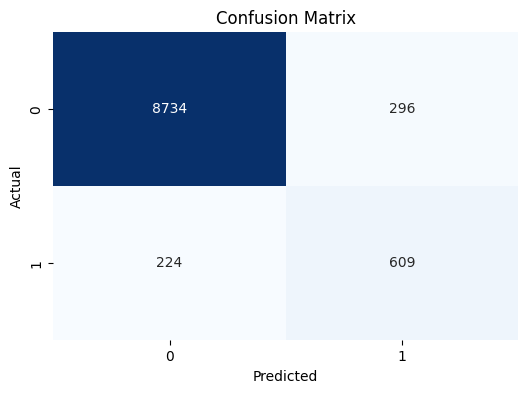

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and labels (y)
X = df.drop('Actiware classification', axis=1)
y = df['Actiware classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define class weights as a dictionary
class_weights = {0: 1.0, 1: 10.0}

# Create a Random Forest Classifier with class weights
rf_classifier = RandomForestClassifier(random_state=42, class_weight = "balanced")

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_classification_rep = classification_report(y_test, y_pred)

print(f'\nRandomForest Model Accuracy: {rf_accuracy}')
print(f'\nRandomForest Model Classification Report:\n{rf_classification_rep}')

# Create a confusion matrix
rf_conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Accuracy of Neural Network Classification: 0.8509012907488577

ANN Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      9030
         1.0       0.96      0.70      0.81       833

    accuracy                           0.97      9863
   macro avg       0.97      0.85      0.90      9863
weighted avg       0.97      0.97      0.97      9863



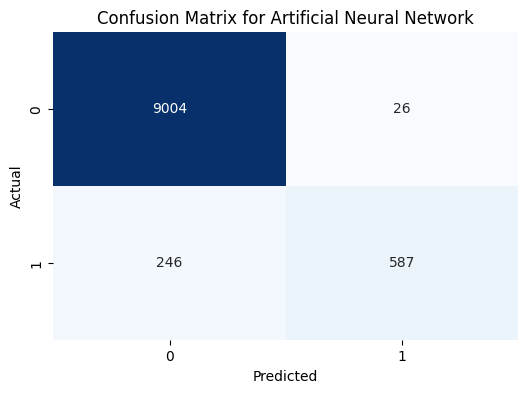

In [ ]:
from sklearn.neural_network import MLPClassifier

# Instantiate the MLPClassifier
neuralNetwork = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1, solver='adam', random_state=42)

# Fit the model on the training data
neuralNetwork.fit(X_train, y_train)
# Make predictions on the test data
y_pred = neuralNetwork.predict(X_test)
# Create a confusion matrix
nn_con_matrix = confusion_matrix(y_test, y_pred)

# Calculate balanced accuracy
nn_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

nn_classification_rep = classification_report(y_test, y_pred)

print(f'\nAccuracy of Neural Network Classification: {nn_balanced_accuracy}')
print(f'\nANN Classification Report:\n{nn_classification_rep}')

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(nn_con_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Artificial Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVC Accuracy: 0.9678596775828855
SVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      9030
         1.0       0.85      0.75      0.80       833

    accuracy                           0.97      9863
   macro avg       0.91      0.87      0.89      9863
weighted avg       0.97      0.97      0.97      9863



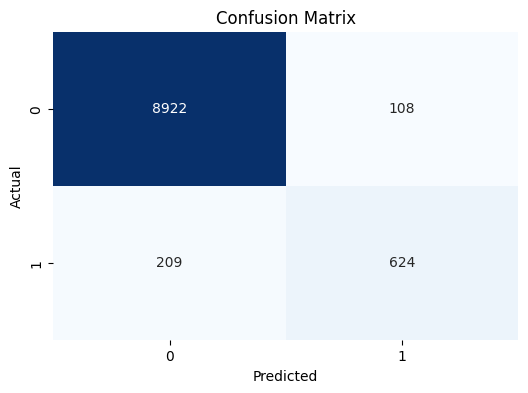

In [ ]:
from sklearn.svm import SVC

# Define class weights as a dictionary
class_weights = {0: 1.0, 1: 10.0}

# Create a Random Forest Classifier with class weights
svm_classifier = SVC(random_state=42, class_weight = "balanced")

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred =svm_classifier.predict(X_test)
# Create a confusion matrix
svc_conf_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model
svc_accuracy = accuracy_score(y_test, y_pred)
svc_classification_rep = classification_report(y_test, y_pred)

print(f'SVC Accuracy: {svc_accuracy}')
print(f'SVC Classification Report:\n{svc_classification_rep}')


# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

